In [54]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# 머신러닝 패키지 추가
import statsmodels.api as sm
import sklearn as sk


In [56]:
# 한글 폰트, 마이너스 
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

#### 데이터준비

다중분류 (7가지 생선중에서 무엇이지 찾기)

In [57]:
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [58]:
pd.unique(fish.Species)

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [59]:
# 훈련 시킬 입력데이터
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [60]:
# numpy를 하는 이유
# 'Weight','Length','Diagonal','Height','Width' --> x0, x1, x2, x3, x4
fish_input[154:]

array([[12.2   , 12.2   , 13.4   ,  2.0904,  1.3936],
       [13.4   , 12.4   , 13.5   ,  2.43  ,  1.269 ],
       [12.2   , 13.    , 13.8   ,  2.277 ,  1.2558],
       [19.7   , 14.3   , 15.2   ,  2.8728,  2.0672],
       [19.9   , 15.    , 16.2   ,  2.9322,  1.8792]])

In [61]:
# 어종에 대한 값을 예측할 결과값 (fish_input에 대한 결과값(대응값))
fish_target = fish['Species'].to_numpy()
fish_target[154:]

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'], dtype=object)

In [62]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(fish_input,fish_target,random_state=42)

In [63]:
print(train_input.shape)
print(test_input.shape)

(119, 5)
(40, 5)


#### 단위값을 표준화

In [64]:
# weight 8~1000 / width 5~10 단위의 갭차이가 너무 큼 --> -2 ~ 2 정도의 실수로 변형
# 표준화 식 : (실제값 - mean(평균)) / stdev(표준편차) 

from sklearn.preprocessing import StandardScaler # fit(), transform() 함수를 묶어 놓은 클래스

ss = StandardScaler() # 생성자
ss.fit(train_input) # x0 ~ x4 평균, 표준편차 등 구해 놓음
train_scaled = ss.transform(train_input) # 표준화 식 대입해서 값을 표준화 시킹
test_scaled = ss.transform(test_input)

In [65]:
train_scaled[:20]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ],
       [-0.9127463 , -0.96490079, -0.95281644, -0.88017186, -0.99153566],
       [-0.79734143, -0.70251203, -0.76172762, -0.78282455, -0.54453018],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [-0.74104638, -0.67439895, -0.73567006, -0.61205928, -0.55733138],
       [-0.86771025, -0.7962223 , -0.89201546, -0.93358694, -1.02183182],
       [ 0.82114147,  0.74999715,  0.67143852,  0.4984706 ,  1.47257213],
       [ 0.30041219,  0.23459067,  0.42823457,  1.36042157,  0.22329758],
       [ 0.33981873,  0.40326915,  0.23714575,  0.28831696,  0.95686692],
       [-0.54401367, -0.51509149, -0.4

In [66]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)

KNeighborsClassifier(n_neighbors=3)

In [67]:
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target)) 

0.8907563025210085
0.85


In [68]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

##### KNN 분류로 예측

In [69]:
test_scaled[:5]

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

In [70]:
test_input[:5]

array([[ 78.    ,  18.7   ,  19.4   ,   5.1992,   3.1234],
       [ 13.4   ,  12.4   ,  13.5   ,   2.43  ,   1.269 ],
       [200.    ,  32.3   ,  34.8   ,   5.568 ,   3.3756],
       [270.    ,  26.    ,  28.7   ,   8.3804,   4.2476],
       [150.    ,  23.    ,  24.5   ,   5.2185,   3.626 ]])

In [71]:
test_target[:5]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

In [72]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [73]:
print(kn.classes_)
proba = kn.predict_proba(test_scaled[:5]) # 예측 결과값을 한눈에 파악할 수 있는 함수
print(np.round(proba,decimals=4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


#### 로지스틱 회귀 (예측모델)

z = a * 무게 + b * 길이 + c * 대각선 + d * 높이 + e * 두께 + f

In [74]:
# 시그모이드 함수를 이해하기 위한 식
z = np.arange(-5,5,0.1)
z

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

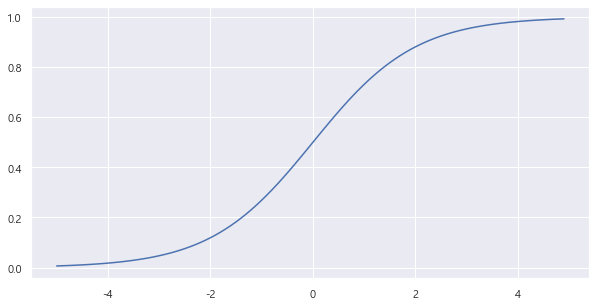

In [75]:
phi = 1 / (1 + np.exp(-z))      # 시그모이드(Sigmoid;로지스틱) 함수
plt.figure(figsize=(10,5))
plt.plot(z,phi)
plt.show()

#### 로지스틱 이진분류

In [76]:
train_target

array(['Bream', 'Pike', 'Smelt', 'Perch', 'Parkki', 'Roach', 'Perch',
       'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Perch', 'Parkki',
       'Perch', 'Bream', 'Smelt', 'Perch', 'Roach', 'Bream', 'Pike',
       'Bream', 'Pike', 'Perch', 'Parkki', 'Bream', 'Perch', 'Pike',
       'Bream', 'Perch', 'Parkki', 'Roach', 'Perch', 'Bream', 'Roach',
       'Perch', 'Bream', 'Bream', 'Perch', 'Perch', 'Roach', 'Pike',
       'Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Parkki', 'Perch',
       'Bream', 'Perch', 'Smelt', 'Perch', 'Parkki', 'Smelt', 'Perch',
       'Perch', 'Roach', 'Bream', 'Perch', 'Perch', 'Roach', 'Roach',
       'Perch', 'Perch', 'Bream', 'Roach', 'Bream', 'Roach', 'Parkki',
       'Perch', 'Perch', 'Perch', 'Perch', 'Pike', 'Pike', 'Perch',
       'Bream', 'Perch', 'Bream', 'Whitefish', 'Pike', 'Bream', 'Bream',
       'Roach', 'Perch', 'Pike', 'Bream', 'Pike', 'Parkki', 'Roach',
       'Perch', 'Roach', 'Smelt', 'Whitefish', 'Roach', 'Perch', 'Bream',
       'Whitefi

In [77]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target =='Smelt')

In [78]:
bream_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

In [79]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [80]:
train_bream_smelt.shape

(33, 5)

#### 이항 로지스틱 회귀(두개만 분류) Bream | Smelt

In [81]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀(분류)

lr = LogisticRegression() # 로지스틱 회귀 클래스
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression()

In [82]:
# 정확도
lr.score(train_bream_smelt,target_bream_smelt)

1.0

In [83]:
# 실제 타겟값
target_bream_smelt[:5]

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [84]:
# 예측 값 확인
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [85]:
# 예측에 사용된 확율 [Bream, Smelt]
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [86]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

#### test 데이터로 예측

In [87]:
# 40 of 159 테스트 데이터의 인덱스
bream_smelt_indexes_2 = (test_target == 'Bream') | (test_target =='Smelt')
bream_smelt_indexes_2

array([False,  True, False, False, False,  True,  True, False, False,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False, False])

In [88]:
# 테스트 데이터에서 Bream,Smelt 만 추출
test_bream_smelt = test_scaled[bream_smelt_indexes_2]
ttarget_bream_smelt = test_target[bream_smelt_indexes_2]

In [89]:
test_bream_smelt.shape

(16, 5)

In [90]:
ttarget_bream_smelt.shape

(16,)

In [91]:
# 테스트 데이터로 정확도 확인
lr.score(test_bream_smelt,ttarget_bream_smelt)

1.0

In [92]:
# 테스트 타겟
print(ttarget_bream_smelt)

['Smelt' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream']


In [93]:
lr.predict(test_bream_smelt)

array(['Smelt', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream'], dtype=object)

In [94]:
# 확률표 도출
proba = lr.predict_proba(test_bream_smelt)#.round()
print(np.round(proba,decimals=3)) # decimal : 표현할 소수점 자리수

[[0.04  0.96 ]
 [0.999 0.001]
 [0.026 0.974]
 [0.994 0.006]
 [0.994 0.006]
 [0.997 0.003]
 [0.999 0.001]
 [0.994 0.006]
 [0.036 0.964]
 [0.994 0.006]
 [0.981 0.019]
 [0.986 0.014]
 [0.999 0.001]
 [0.023 0.977]
 [0.034 0.966]
 [0.951 0.049]]


#### 로지스틱 회귀 다중 분류

이진 분류 --[ 확장 ]--> 다중 분류

In [131]:
lr = LogisticRegression(C=20,max_iter=200)
lr.fit(train_scaled,train_target)

LogisticRegression(C=20, max_iter=200)

In [132]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [133]:
lr.predict(test_scaled[:10])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Bream', 'Smelt',
       'Roach', 'Perch', 'Pike'], dtype=object)

- 예측값 : ['Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Bream', 'Smelt', 'Roach', 'Perch', 'Pike']
- 실제값 : ['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch' 'Bream' 'Smelt' 'Roach' 'Perch' 'Pike']

In [136]:
# 예측과 실제가 맞는지 확인
print(test_target[:10])
print(lr.classes_)
proba = lr.predict_proba(test_scaled[:10])
print(np.round(proba,decimals=3))

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch' 'Bream' 'Smelt' 'Roach'
 'Perch' 'Pike']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]
 [0.999 0.    0.    0.    0.    0.    0.   ]
 [0.    0.001 0.05  0.    0.004 0.945 0.   ]
 [0.001 0.007 0.32  0.015 0.638 0.001 0.018]
 [0.    0.002 0.802 0.002 0.182 0.    0.011]
 [0.    0.    0.023 0.977 0.    0.    0.   ]]
